<a href="https://colab.research.google.com/github/Strojove-uceni/23206-final-sign-language-recognition-in-video/blob/main/data_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import math
import sys
import cv2
import io

from google.colab import drive

# Connect to Google Drive

In [3]:
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab Notebooks/SU2/data"

Mounted at /content/drive


# Load data informations

In [4]:
df_train = pd.read_csv(path + "/train.csv", sep=",")
df_train.head()

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie


# Load all files in linked repository

(Načtení jedné složky trvá zatraceně dlouho)

In [26]:
# Dictionary for data
data = {}

# Listing all participant indexes
for participant_folder in os.listdir(path + "/train_landmark_files/"):
  path_folder = path + "/train_landmark_files/" + participant_folder + "/"
  # Listing all files for participant
  for file_name in os.listdir(path_folder):
    path_file = "train_landmark_files/" + participant_folder + "/" + file_name
    # Find row with sing information
    df_file_info = df_train[df_train.path == path_file]
    # Load DataFrame
    df_file = pd.read_parquet(path + "/" + path_file, engine='pyarrow')
    # Write into dictionary
    data[df_file_info.sign.values[0]] = {"participant_id": df_file_info.participant_id.values[0], "points": df_file}

In [29]:
key_word = "eye"

print(data[key_word])

{'participant_id': 2044, 'points':        frame            row_id        type  landmark_index         x  \
0         17         17-face-0        face               0  0.479991   
1         17         17-face-1        face               1  0.471182   
2         17         17-face-2        face               2  0.473635   
3         17         17-face-3        face               3  0.461127   
4         17         17-face-4        face               4  0.470500   
...      ...               ...         ...             ...       ...   
14113     42  42-right_hand-16  right_hand              16  0.499736   
14114     42  42-right_hand-17  right_hand              17  0.563641   
14115     42  42-right_hand-18  right_hand              18  0.561738   
14116     42  42-right_hand-19  right_hand              19  0.540343   
14117     42  42-right_hand-20  right_hand              20  0.527013   

              y         z  
0      0.482086 -0.043847  
1      0.443027 -0.068289  
2      0.456504 

# Load one file in linked repository

In [31]:
# "sequence_id" of file to be opened
search_sequence = 10293515

# Load DataFrame
df_example = pd.read_parquet(path + "/" + df_train[df_train.sequence_id == search_sequence].path.values[0], engine='pyarrow')
df_example.head()

,frame,row_id,type,landmark_index,x,y,z
0,15,15-face-0,face,0,0.452484,0.485832,-0.039617
1,15,15-face-1,face,1,0.446536,0.450832,-0.060590
2,15,15-face-2,face,2,0.449041,0.462428,-0.036166
3,15,15-face-3,face,3,0.439351,0.425082,-0.038612
4,15,15-face-4,face,4,0.446334,0.441689,-0.062517


# Plot example

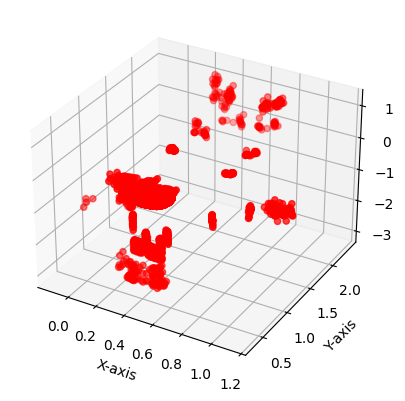

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[key_word]["points"]["x"], data[key_word]["points"]['y'], data[key_word]["points"]['z'], c='r', marker='o') # You can customize the color and marker

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()